
### Q1: Questions about PyMC...

This is a structured list of PyMC Example Gallery items. Each title links to its corresponding PyMC gallery page. The images are selected from each page and displayed in a markdown table.

### **Selected PyMC Topics**

- [Introductory Overview of PyMC](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html)
- [GLM: Linear regression](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/GLM_linear.html)
- [Model comparison](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/model_comparison.html)
- [Prior and Posterior Predictive Checks](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/posterior_predictive.html)
- [Distribution Dimensionality](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/dimensionality.html)
- [PyMC and PyTensor](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_pytensor.html)
- [Gaussian Processes](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/Gaussian_Processes.html)

| | | |
|-|-|-|
|![](https://www.pymc.io/projects/docs/en/stable/_images/9ea5b043586ce226d8dcf2bfbe9e5634c0b28c20e1129728d9753c1cb54777a3.png)|![](https://www.pymc.io/projects/docs/en/stable/_images/ad02eabf1d3154d899455a5078259474f2133ba633129b2cb25c831284723dc7.png)|![](https://www.pymc.io/projects/docs/en/stable/_images/270be4d73a90733f93abe34f7f15e76428600d61b57df128acb78d2096a7c058.png)|
|*Overview*|*Linear Regression*|*Model Comparison*|
|![](https://www.pymc.io/projects/docs/en/stable/_images/b84d7054a68a06b9a9d462a4c1b44bb826b4c04b3c0b855b99fc794af87610f6.png)|![](https://www.pymc.io/projects/docs/en/stable/_images/73352774c2286019a31b211a29ee527bace6cc46ab421aa3e4c3f572a6658da5.svg)|![](https://www.pymc.io/projects/docs/en/stable/_images/8c363e9de8872b7ab545c203959bd5958fe2a55761ea45bc391ec893a51c4245.png)|
|*Prior & Posterior*|*Dimensionality*|*PyMC & PyTensor*|



In [3]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

In [4]:
#Q2
# Generate some synthetic data
np.random.seed(42)
data = np.random.normal(5, 2, size=100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, tau]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


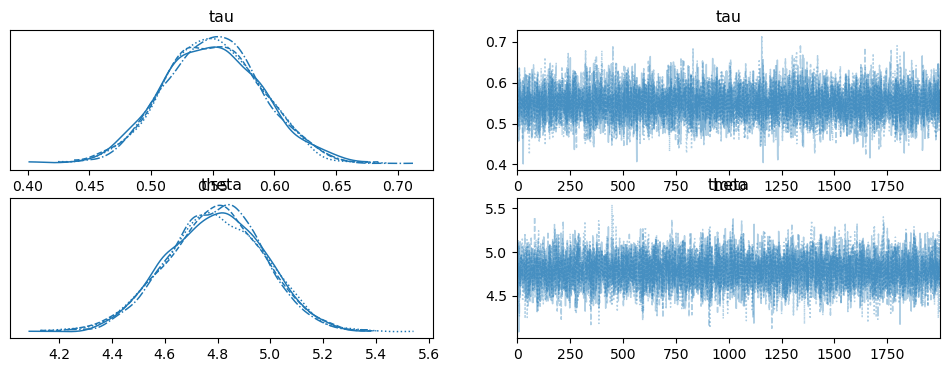

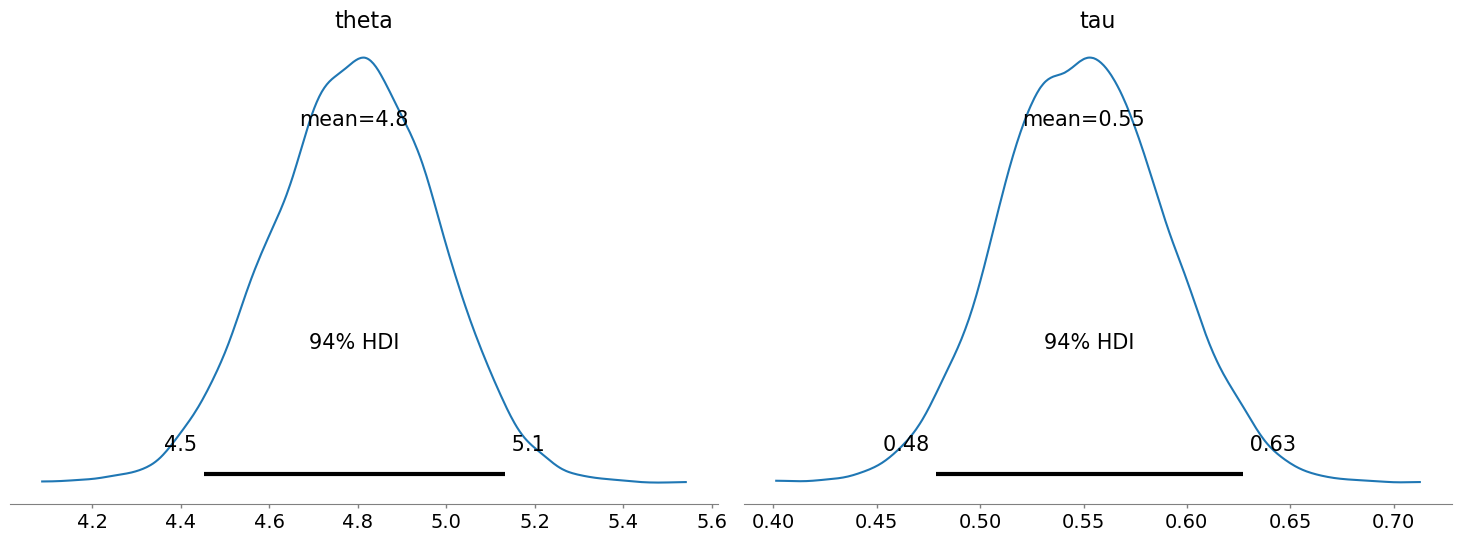

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
tau    0.550  0.040   0.479    0.627      0.000    0.000    7457.0    5433.0   
theta  4.791  0.184   4.452    5.133      0.002    0.001    8081.0    5776.0   

       r_hat  
tau      1.0  
theta    1.0  


In [11]:
# Model 1: Normal prior for theta, Gamma prior for tau
with pm.Model() as model1:
    theta = pm.Normal("theta", mu=0, sigma=10)
    tau = pm.Gamma("tau", alpha=1, beta=1)
    likelihood = pm.Normal("likelihood", mu=theta, sigma=1/tau, observed=data)
    trace1 = pm.sample(2000, return_inferencedata=True)

az.plot_trace(trace1)
plt.show()

az.plot_posterior(trace1, var_names=["theta", "tau"], hdi_prob=0.94)
plt.tight_layout()
plt.show()
print(az.summary(trace1))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, tau]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


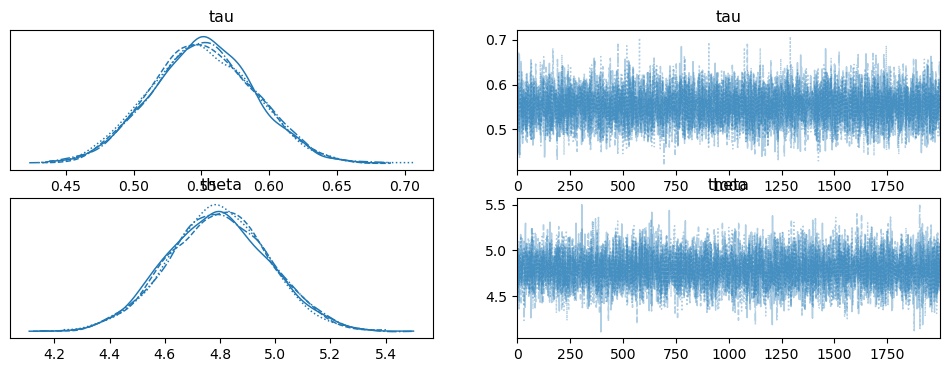

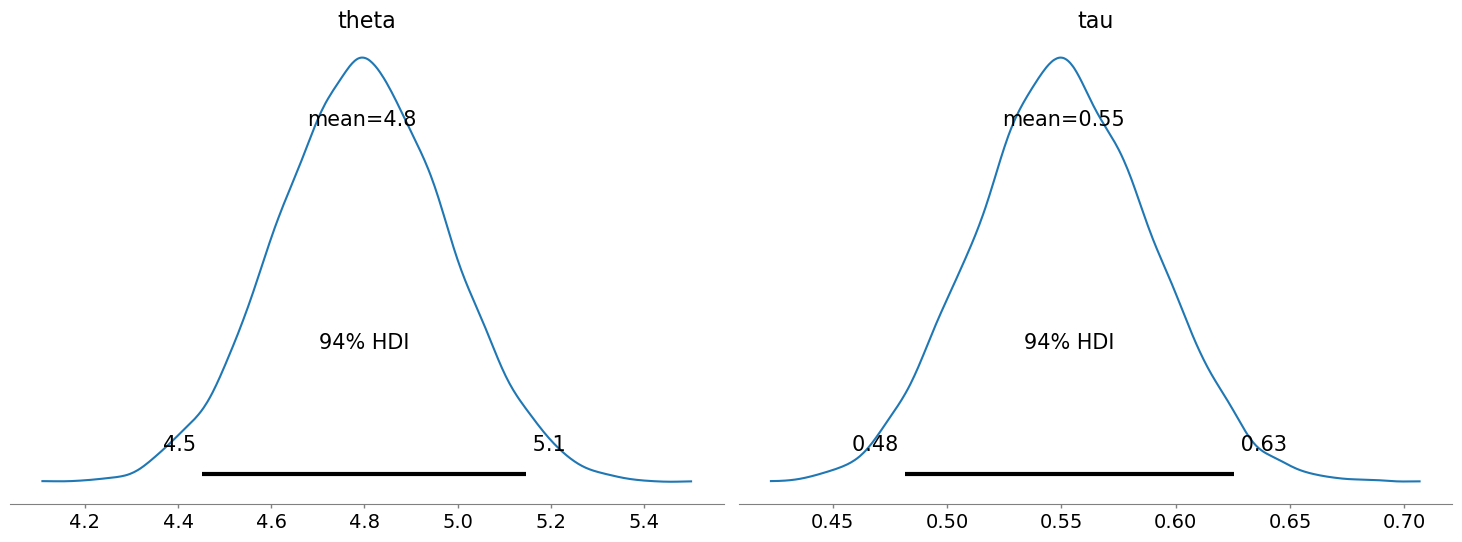

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
tau    0.551  0.039   0.481    0.625      0.000    0.000    8573.0    6149.0   
theta  4.795  0.184   4.452    5.147      0.002    0.001    8794.0    5823.0   

       r_hat  
tau      1.0  
theta    1.0  


In [13]:
#Model 2: StudentT prior for theta, HalfCauchy prior for tau
with pm.Model() as model2:
    theta = pm.StudentT("theta", nu=3, mu=0, sigma=10)
    tau = pm.HalfCauchy("tau", beta=1)
    likelihood = pm.Normal("likelihood", mu=theta, sigma=1/tau, observed=data)
    trace2 = pm.sample(2000, return_inferencedata=True)

az.plot_trace(trace2)
plt.show()

az.plot_posterior(trace2, var_names=["theta", "tau"], hdi_prob=0.94)
plt.tight_layout()
plt.show()
print(az.summary(trace2))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, tau]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


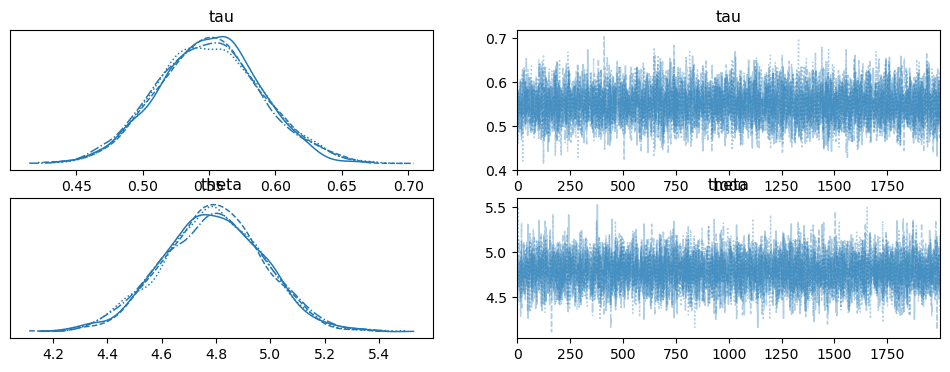

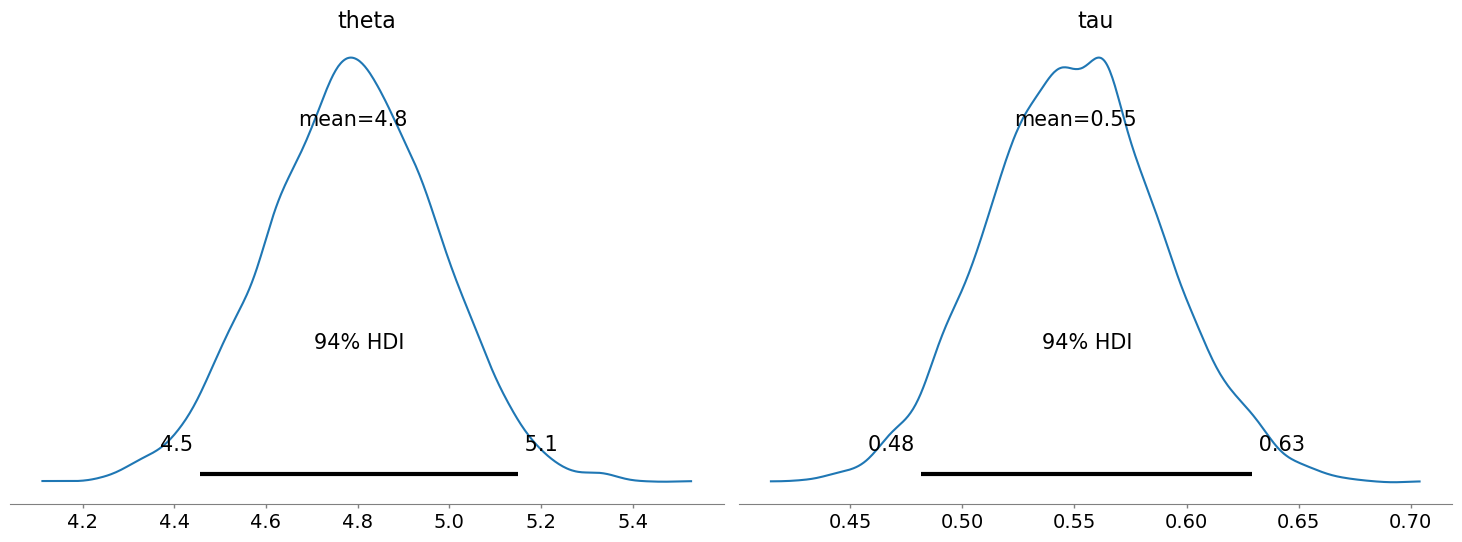

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
tau    0.550  0.039   0.482    0.629      0.000    0.000    7798.0    5864.0   
theta  4.789  0.186   4.456    5.149      0.002    0.002    6993.0    5967.0   

       r_hat  
tau      1.0  
theta    1.0  


In [12]:
#Model 3: Laplace prior for theta, Exponential prior for tau
with pm.Model() as model3:
    theta = pm.Laplace("theta", mu=0, b=10)
    tau = pm.Exponential("tau", lam=1)
    likelihood = pm.Normal("likelihood", mu=theta, sigma=1/tau, observed=data)
    trace3 = pm.sample(2000, return_inferencedata=True)

az.plot_trace(trace3)
plt.show()

az.plot_posterior(trace3, var_names=["theta", "tau"], hdi_prob=0.94)
plt.tight_layout()
plt.show()
print(az.summary(trace3))

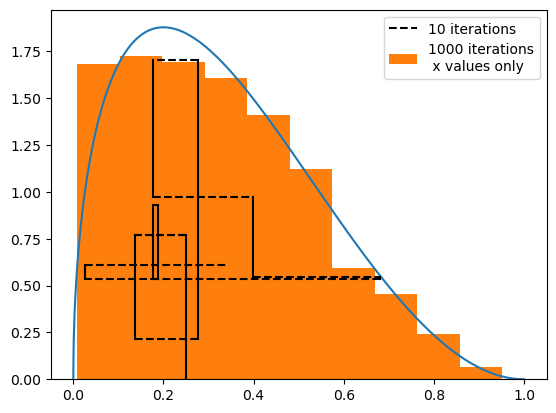

In [14]:
#Q3
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def slice_f_at_y(f, x, y, x_grid=np.linspace(0,1,51)):
    x_grid_delta = x_grid[1] - x_grid[0]
    a, b = x_grid[f(x_grid) > y][[0, -1]] + [-x_grid_delta, x_grid_delta]
    x_ = a + stats.uniform().rvs() * (b - a)
    if f(x_) > y:
        return x_, 1  
    elif x_ < x:
        x_l, x_r = x_, b
    else:
        x_l, x_r = a, x_
    return slice_f_at_y_(f, x, y, x_l, x_r, tot=2)

def slice_f_at_y_(f, x, y, x_l=0, x_r=1, tot=1):
    x_ = x_l + stats.uniform().rvs() * (x_r - x_l)
    if f(x_) > y:
        return x_, tot
    elif x_ < x:
        x_l = x_
    else:
        x_r = x_
    return slice_f_at_y_(f, x, y, x_l, x_r, tot=tot + 1)

# Define the target distribution
x_grid = np.linspace(0, 1, 1000)
f = lambda x: stats.beta(1.5, 3).pdf(x)
plt.plot(x_grid, f(x_grid))

m = 1000
x = np.zeros([m + 1, 3])
x[:2, 0] = 0.25

plot_trace = 10
for t in range(1, m):
    x[t, 1] = stats.uniform().rvs() * f(x[t, 0])
    if t < plot_trace:
        plt.plot([x[t, 0]] * 2, [x[t - 1, 1], x[t, 1]], 'k')
    
    x[t + 1, 0], x[t + 1, 2] = slice_f_at_y(f, x[t, 0], x[t, 1])
    if t < plot_trace:
        if t == 1:
            plt.plot([x[t, 0], x[t + 1, 0]], [x[t, 1]] * 2, 'k--', label=str(plot_trace) + " iterations")
        plt.plot([x[t, 0], x[t + 1, 0]], [x[t, 1]] * 2, 'k--')

plt.hist(x[:, 0], density=True, label=str(m) + " iterations\n x values only")
plt.legend()
plt.show()


# Slice Sampling Explanation in RMarkdown

## First explain how the Markov algorithm of slice sampling as given below works.

Slice sampling is a Markov Chain Monte Carlo (MCMC) technique that is useful for sampling from probability distributions where the normalization constant is unknown. It avoids the need for a proposal distribution by introducing an auxiliary variable that allows sampling from a region under the probability density function.

### Steps in the Algorithm:

1. **Define the Target Function**: We specify a probability density function (PDF) $f(x)$ to sample from.
2. **Initialization**: Start with an initial sample $x$.
3. **Select a Vertical Slice**: Draw a random $y$ uniformly from $[0, f(x)]$, which creates a horizontal slice.
4. **Find the Interval**: Determine the interval where $f(x) \geq y$.
5. **Sample a New Value**: Draw $x'$ uniformly from this interval.
6. **Repeat**: Iterate the process to generate valid samples forming a Markov chain.

This method is particularly effective in cases where direct sampling is difficult due to an unknown normalization constant. It can also be integrated into Gibbs sampling as an alternative to Metropolis-Hastings when working with full conditionals.

## Then explain the steps by which slice sampling could be used in place of a Metropolis-Hastings step in a Metropolis within Gibbs algorithm where the full conditionals are only known up to a normalizing constant.

- **Sampling Full Conditionals**: Instead of proposing a sample and deciding whether to accept it, as in Metropolis-Hastings, slice sampling directly selects a valid sample from the distribution.
- **Defining the Slice**: The function used for sampling is the unnormalized conditional probability. The curve that we are sampling beneath represents this unnormalized conditional density function.
- **Initial Value Selection**: The Markov chainâ€™s current state is used as the starting value.
- **Iterate the Process**: Repeat the slice sampling procedure for each variable in the Gibbs cycle to update individual parameters.
- **Creating the Draw for Gibbs Sampling**: Each draw is obtained by setting up the slice, determining the valid region, and selecting a new sample within that region, ensuring that the stationary distribution aligns with the desired posterior.